In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
import numpy as np

import sys
sys.path.append("../")

In [107]:
all_tires = {
    # "cornering_Hoosier_16x6.0-10_R20_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    "cornering_Hoosier_16x6.0-10_LCO_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    # "cornering_Hoosier_16x6
    # .5-10_R20_7":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x6.0-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None},
    # "cornering_Hoosier_16x7.5-10_R20_8":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_LCO_8":{"long":None, "lat":None}
}

In [108]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
tire_scaling = 2 / 3

tire_dict = all_tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
    except:
        print("Error getting lateral data for {0}".format(name))

In [109]:
FZ_lst = []
mu_lst = []

for name, tire in all_tires.items():
    normal_loads = sorted(np.array(tire["lat"]["load"].unique()))
    current_mu_lst = []
    for load in normal_loads:
        temp = tire["lat"][tire["lat"]["load"] == load]
        
        current_mu_lst.append(max(temp["FY"]) * tire_scaling / abs(load))
    
    FZ_lst.append([load * -1 for load in normal_loads])
    mu_lst.append(current_mu_lst)

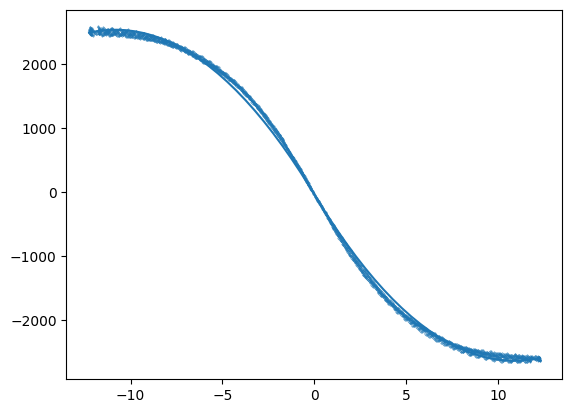

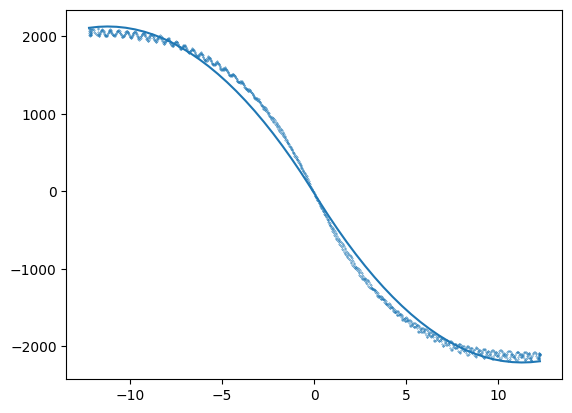

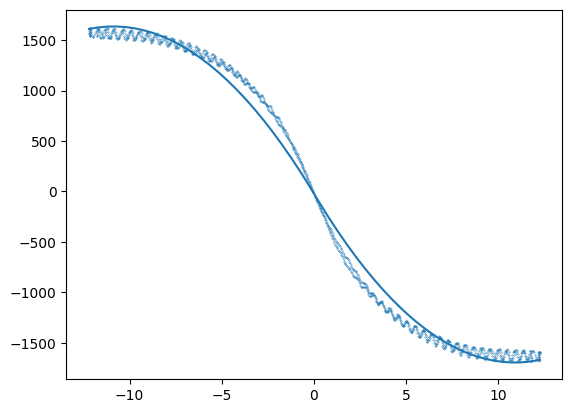

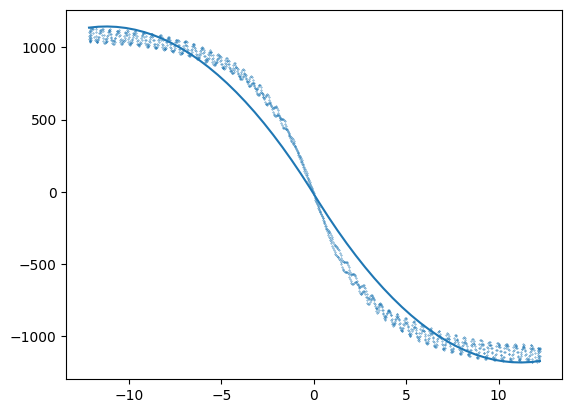

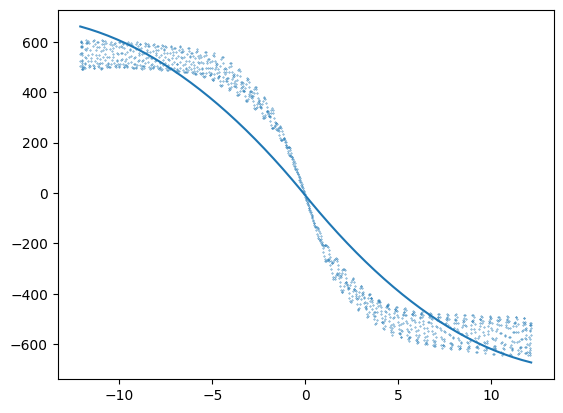

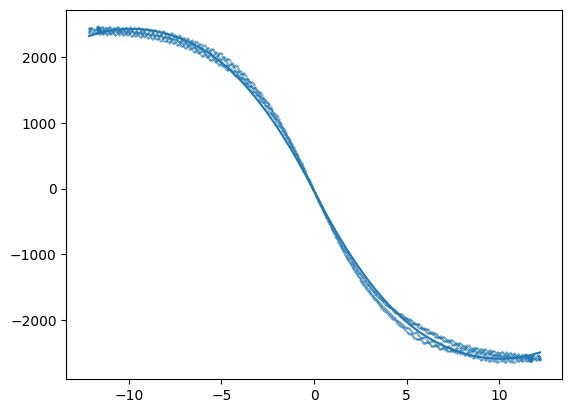

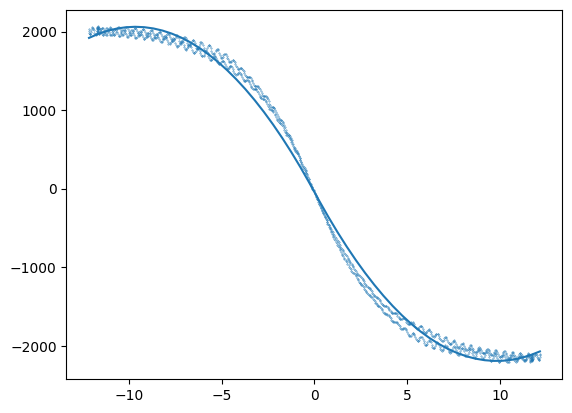

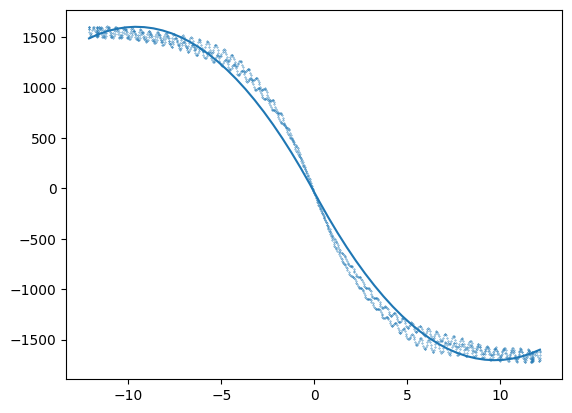

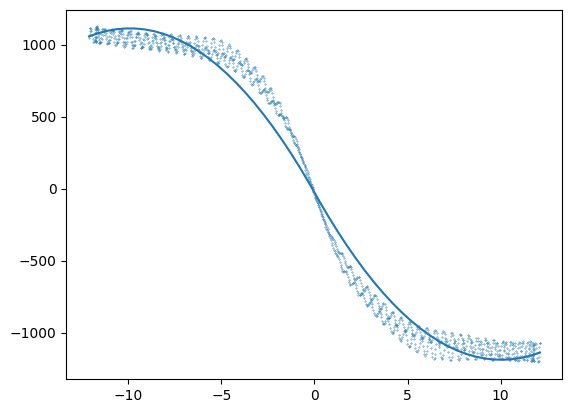

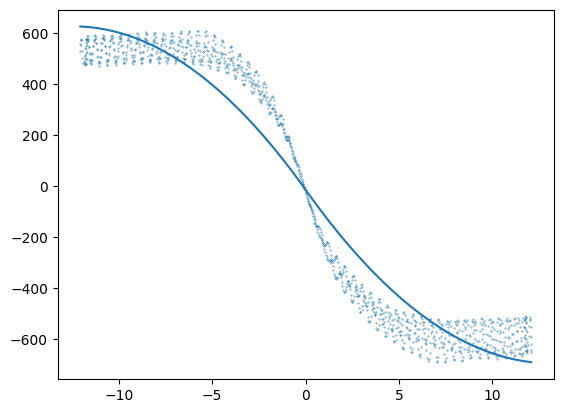

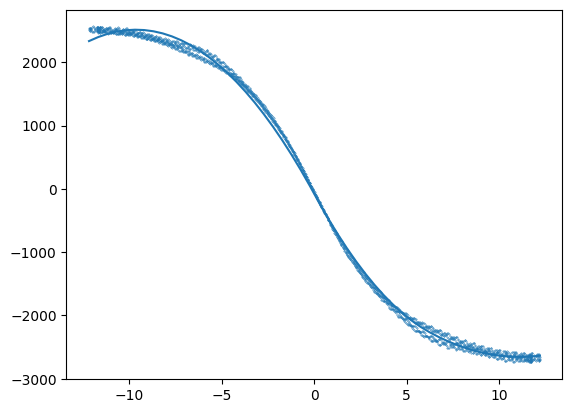

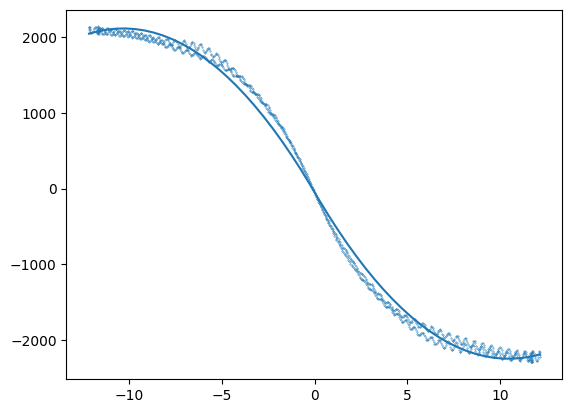

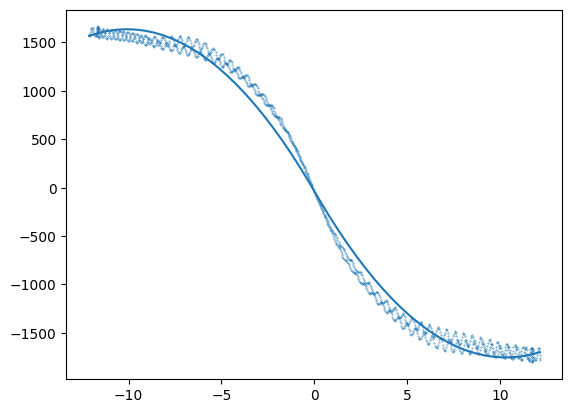

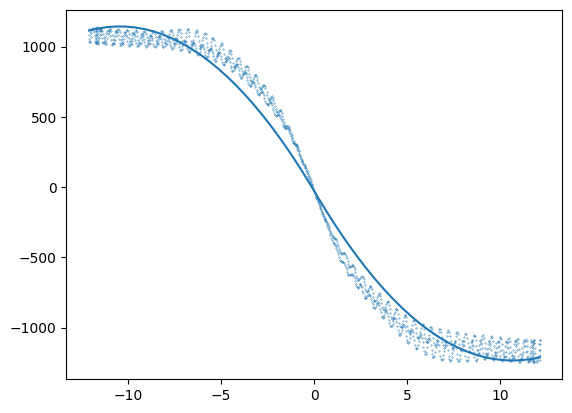

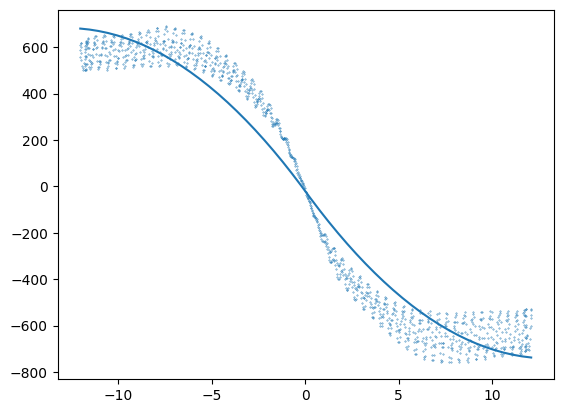

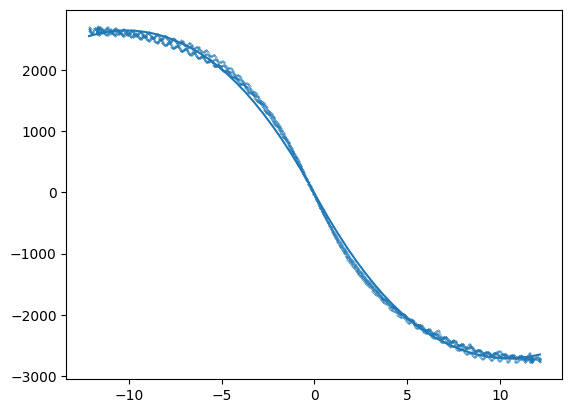

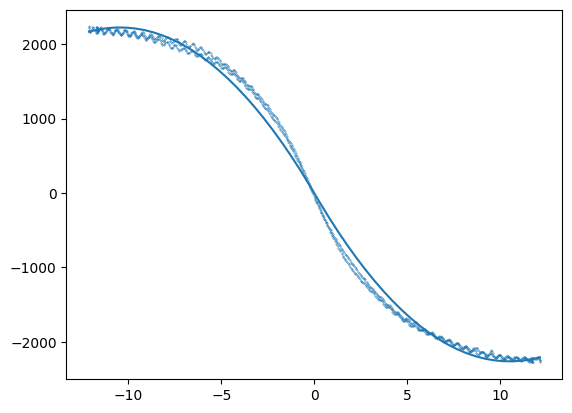

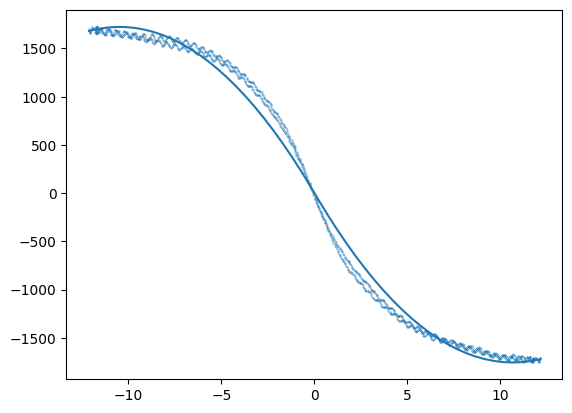

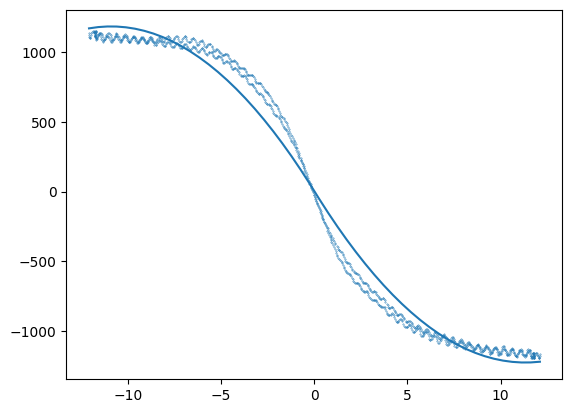

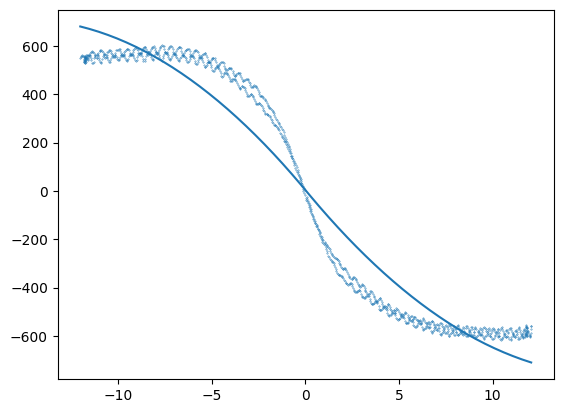

In [110]:
for name, tire in all_tires.items():
    normal_loads = sorted(np.array(tire["lat"]["load"].unique()))
    current_mu_lst = []
    for load in normal_loads:
        plt.figure()
        temp = tire["lat"][tire["lat"]["load"] == load]

        temp2 = tire["lat"][tire["lat"]["load"] == load].sort_values("SA")

        smoothed_func = UnivariateSpline(temp2["SA"], temp2["FY"], k=2, s = 1.5e7)
        x_vals = np.linspace(min(temp2["SA"]), max(temp2["SA"]))
        y_vals = smoothed_func(x_vals)

        plt.plot(x_vals, y_vals)

        plt.scatter(temp["SA"], temp["FY"], s=0.1)

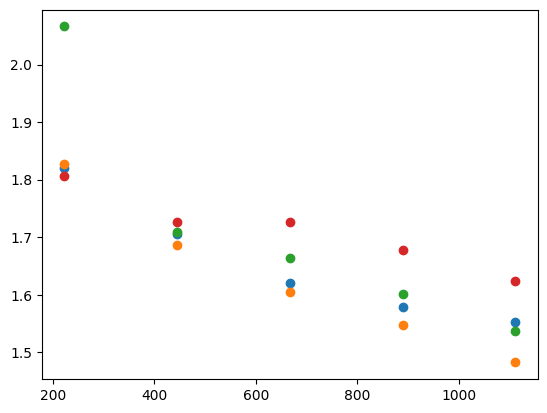

In [111]:
for i in range(len(FZ_lst)):
    plt.scatter(FZ_lst[i], mu_lst[i])

# smoothed_func = UnivariateSpline(temp["SA"], temp["FY"], s = 1.5e6)
# x_vals = np.linspace(min(temp["SA"]), max(temp["SA"]))
# y_vals = smoothed_func(x_vals)

# plt.plot(x_vals, y_vals)

# print(y_vals)

# mu = max(abs(y_vals)) / load
# print(mu)

In [112]:
peak_mu_lst = []
tire_name = []

normal_loads = sorted(np.array(tire["lat"]["load"].unique()))

for name, tire in all_tires.items():
    peak_mu = []
    for load in normal_loads:
        temp = tire["lat"][tire["lat"]["load"] == load]

        peak_mu.append(max(temp["FY"]) * 2/3 / abs(load))

    peak_mu_lst.append(peak_mu)
    tire_name.append(name)


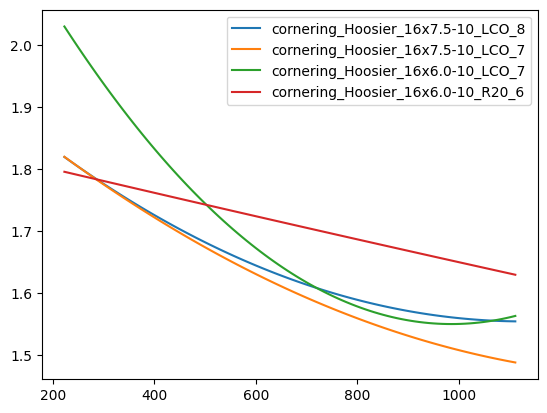

In [114]:
tire_names = tire_name[::-1]

for i in range(len(peak_mu_lst)):
    reversed_mu = peak_mu_lst[i][::-1]
    adjusted_FZ = sorted(-1 * np.array(normal_loads))
    plot = UnivariateSpline(adjusted_FZ, reversed_mu, k = 2)
    # plt.scatter(adjusted_FZ, reversed_mu)
    x_vals = np.linspace(min(adjusted_FZ), max(adjusted_FZ), 100)
    y_vals = plot(x_vals)

    plt.plot(x_vals, y_vals)
plt.legend(tire_names)